In [1]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

In [2]:
ds = xr.open_dataset("crocus-neiu-ceil-a1-20230825-000000.nc")

In [36]:
ds = act.io.read_arm_netcdf(files2[0])

In [32]:
os.getcwd()

'/home/rskwarek/git-repos/open_source_cookbook/notebooks'

crocus-neiu-ceilometer-a1-202305280000.nc


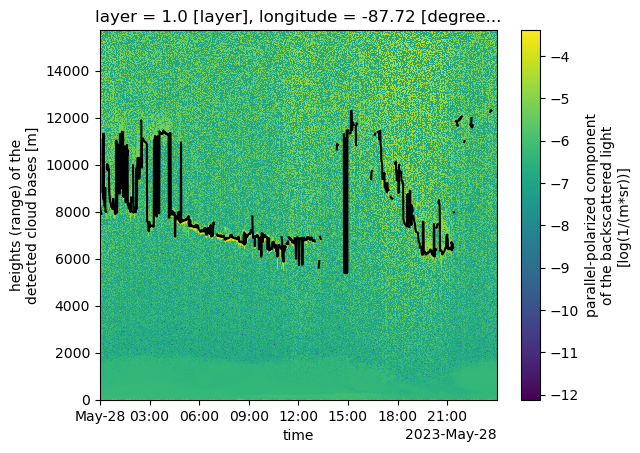

crocus-neiu-ceilometer-a1-202305310000.nc


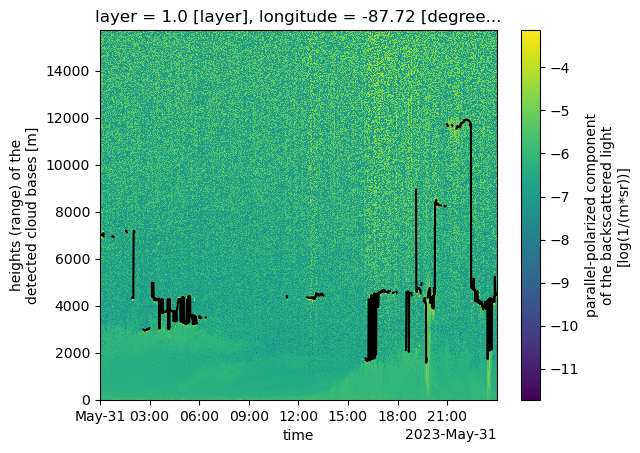

crocus-neiu-ceilometer-a1-202305270000.nc


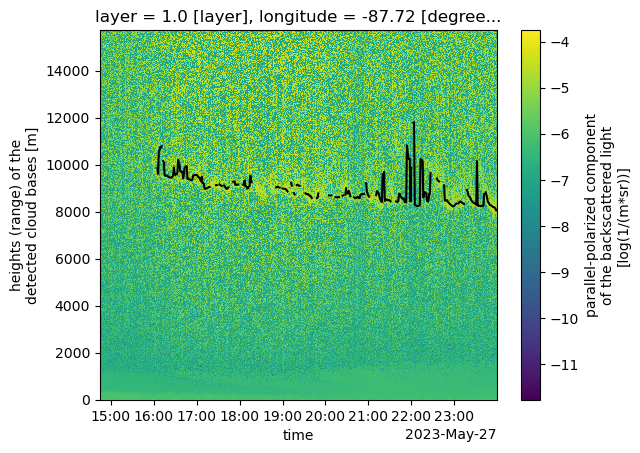

crocus-neiu-ceilometer-a1-202306030000.nc


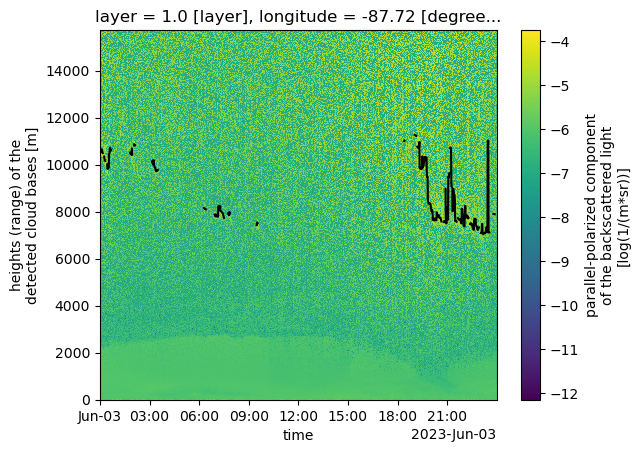

crocus-neiu-ceilometer-a1-202306010000.nc


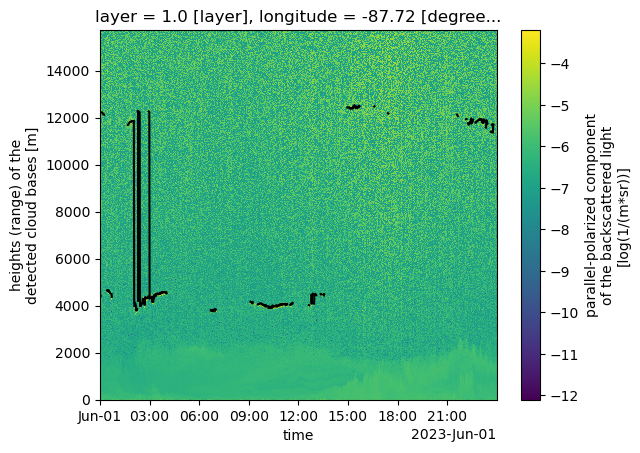

crocus-neiu-ceilometer-a1-202306020000.nc


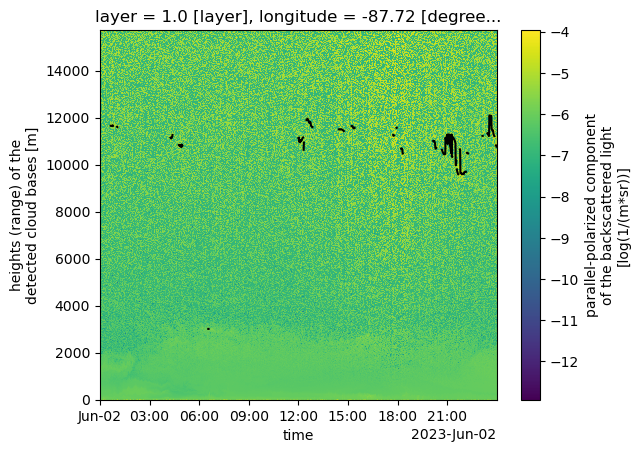

crocus-neiu-ceilometer-a1-202305300000.nc


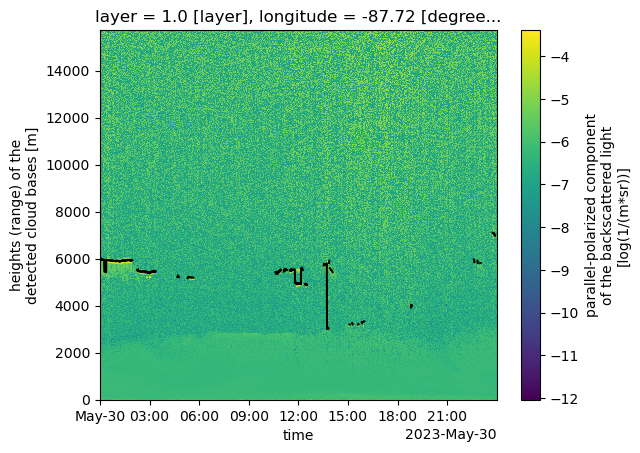

crocus-neiu-ceilometer-a1-202306040000.nc


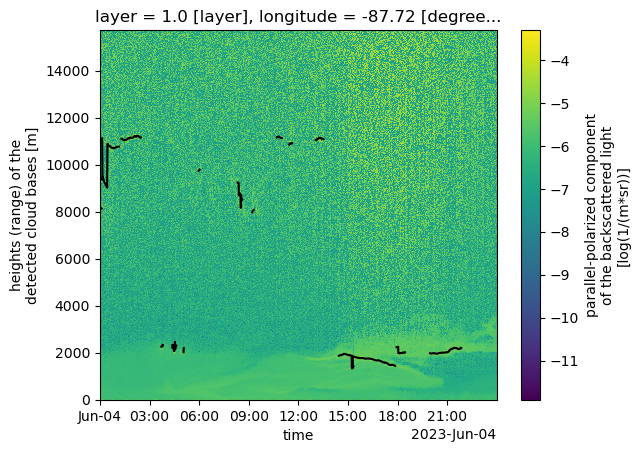

In [3]:
for file in files2:
    print(file)
    ds = act.io.read_arm_netcdf(file)
    ds.backscatter.plot(x='time')
    ds.cloud_base_heights.isel(layer=0).plot(color='k', x='time')
    plt.show()
    plt.close()

In [10]:
ds.attrs['datastream'] = 'celiometer.b1'

In [27]:
#variables = ['backscatter', 'cloud_base_heights']

In [16]:
variables=['p_pol', 'x_pol', 'linear_depol_ratio', 'backscatter']

In [34]:
ds = act.corrections.correct_ceil(ds)

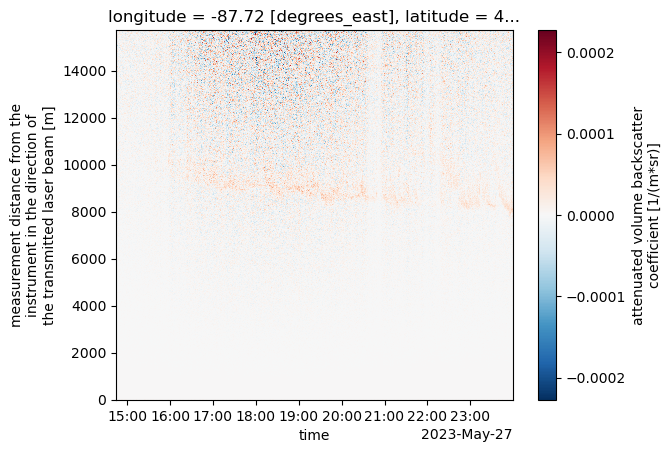

In [52]:
ds.beta_att.plot(x='time')

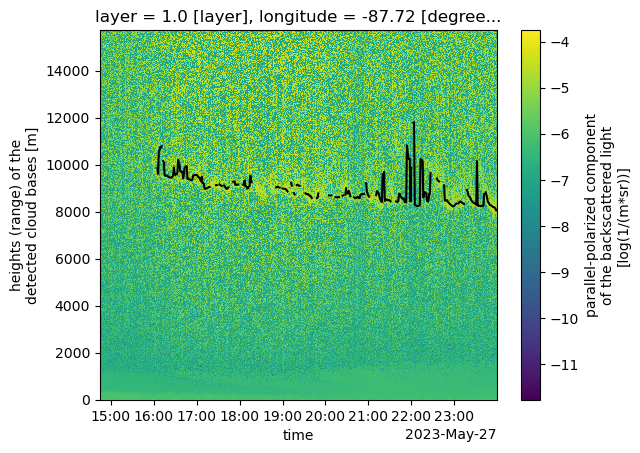

In [47]:
ds.backscatter.plot(x='time')
ds.cloud_base_heights.isel(layer=0).plot(color='k', x='time')

In [29]:
ds.backscatter.min().compute()

<xarray.DataArray 'backscatter' ()> Size: 4B
array(-12.143065, dtype=float32)
Coordinates:
    longitude  float64 8B -87.72
    latitude   float64 8B 41.98

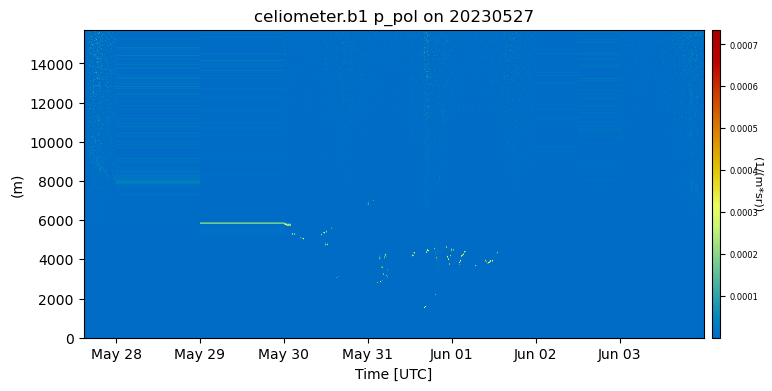

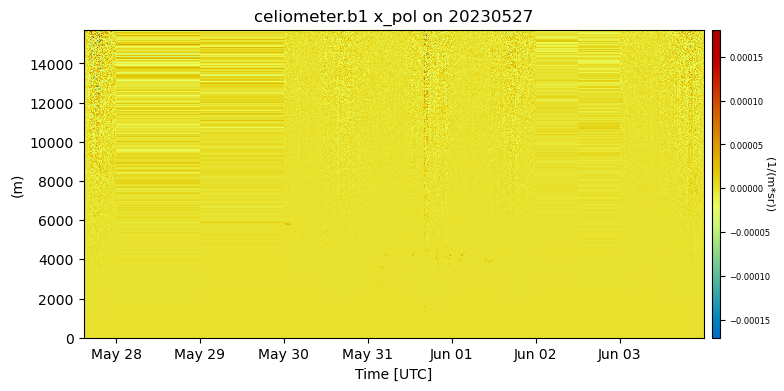

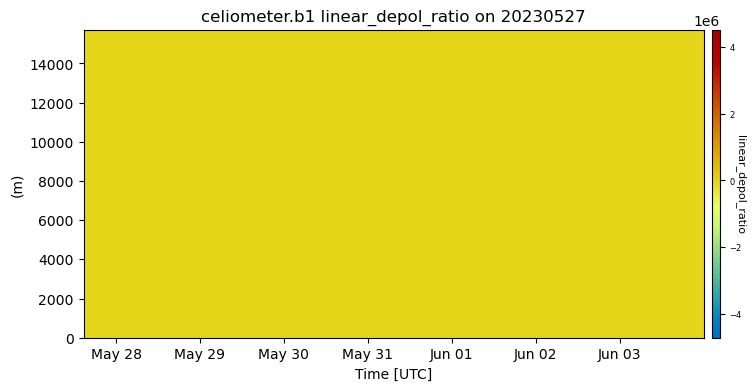

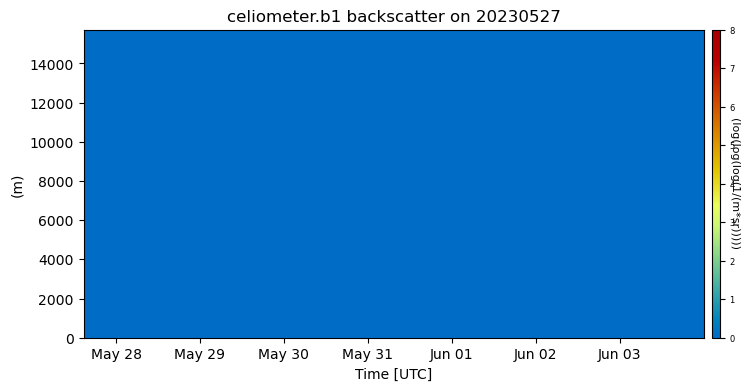

In [17]:
for variable in variables:
    display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'backscatter':
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     vmin=0,
                     vmax=8,
                     y_rng=(0, ds.range.max().values))
    else:
        display.plot(variable,
                     cmap='HomeyerRainbow',
                     y_rng=(0, ds.range.max().values))
    plt.show()
    plt.close()